Покликання на завдання

https://cms.ucu.edu.ua/mod/vpl/view.php?id=306600&userid=9954 

У модулі expression_calculator.py напишіть функцію calculate_expression, яка буде приймати єдиний аргумент - стрічку з простим формулюванням математичного виразу та повертати ціле число - результат цього виразу. 

Наприклад: параметр функції – «Скільки буде 5 додати 5?», результат функції – 10; або «Скільки буде 2 помножити на 10 додати 7?», результат функції – 27. Для простоти функція не має враховувати пріоритетність операцій, тобто результатом виразу «Скільки буде 2 додати 10 помножити на 7?» буде 84, а не 72. 

Операції, які підтримує функція – "додати"/"плюс", "відняти"/"мінус", "помножити на", "поділити на".  Функція також має вертати стрічку «Неправильний вираз!», якщо вираз не правильний, а саме:

Операції які не підтримуються («Скільки буде 3 в квадраті?»)
Не математичні вирази («Скільки сезонів в році?»)
Математичні операції з неправильним синтаксисом («Скільки буде 2 2 додати?»)

Приклад

calculate_expression("Скільки буде 8 відняти 3?")

5

calculate_expression("Скільки буде 7 додати 3 помножити на 5?")

50

calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")

9

calculate_expression("Скільки буде 3 в кубі?")

'Неправильний вираз!'


Початковий промпт дуже простий:

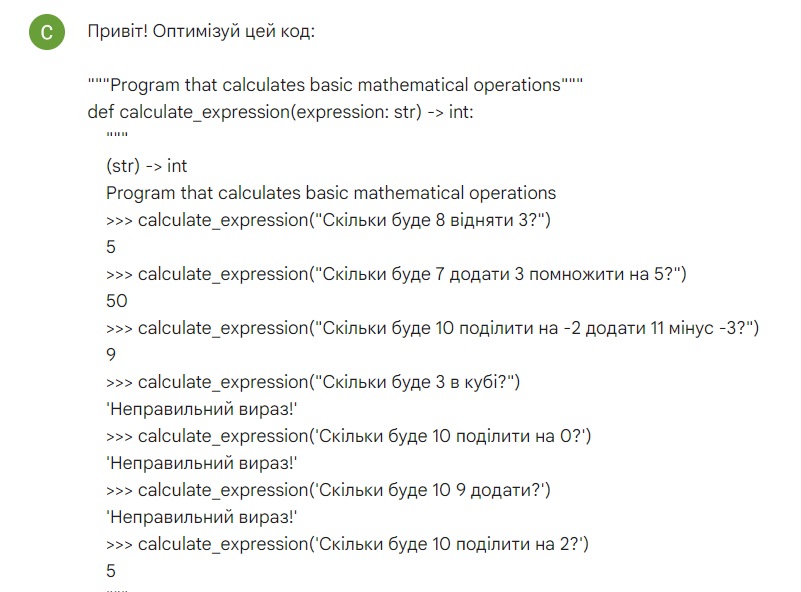

In [1]:
def calculate_expression(expression: str) -> int:
    """
    (str) -> int
    Програма, що обчислює базові математичні операції.
    >>> calculate_expression("Скільки буде 8 відняти 3?")
    5
    >>> calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
    50
    >>> calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
    9
    >>> calculate_expression("Скільки буде 3 в кубі?")
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 0?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 9 додати?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 2?')
    5
    """
    if not isinstance(expression, str) or not expression.startswith("Скільки буде") or not expression.endswith("?"):
        return "Неправильний вираз!"

    expression = expression[16:-1].replace(',', '')
    tokens = expression.split()

    operators = ["додати", "плюс", "відняти", "мінус", "помножити", "поділити"]
    numbers = []
    for token in tokens:
        if token.isnumeric() or "-" in token:
            numbers.append(int(token))
        elif token in operators:
            numbers.append(token)
        else:
            return "Неправильний вираз!"

    if len(numbers) < 3:
        return "Неправильний вираз!"

    result = numbers[0]
    for i in range(1, len(numbers)):
        if isinstance(numbers[i], str):
            current_operator = numbers[i]
        elif isinstance(numbers[i], int):
            if current_operator == "додати":
                result += numbers[i]
            elif current_operator == "відняти":
                result -= numbers[i]
            elif current_operator == "помножити":
                result *= numbers[i]
            elif current_operator == "поділити":
                if numbers[i] == 0:
                    return "Неправильний вираз!"
                result /= numbers[i]

    return int(result)

if __name__ == "__main__":
    import doctest
    print(doctest.testmod())


**********************************************************************
File "__main__", line 5, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 8 відняти 3?")
Expected:
    5
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 7, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
Expected:
    50
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 9, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
Expected:
    9
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 17, in __main__.calculate_expression
Failed example:
    calculate_expression('Скільки буде 10 поділити на 2?')
Expected:
    5
G

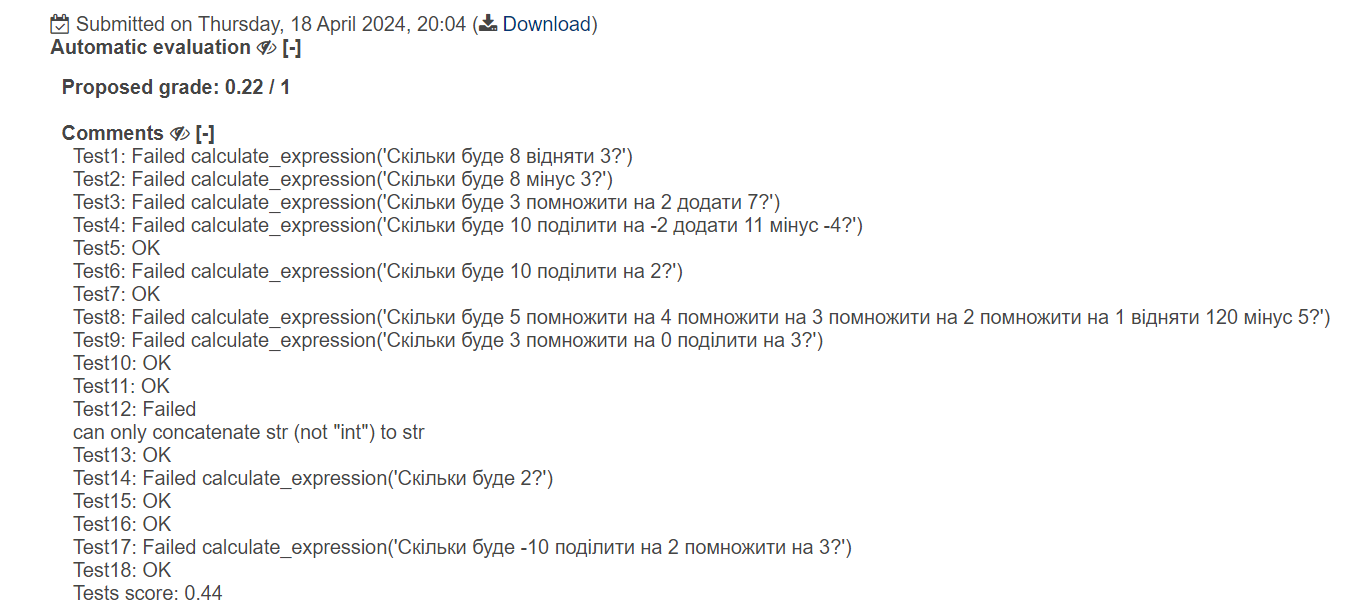

Далі я спробувала запитати те саме, але англійською, все стало ще гірше

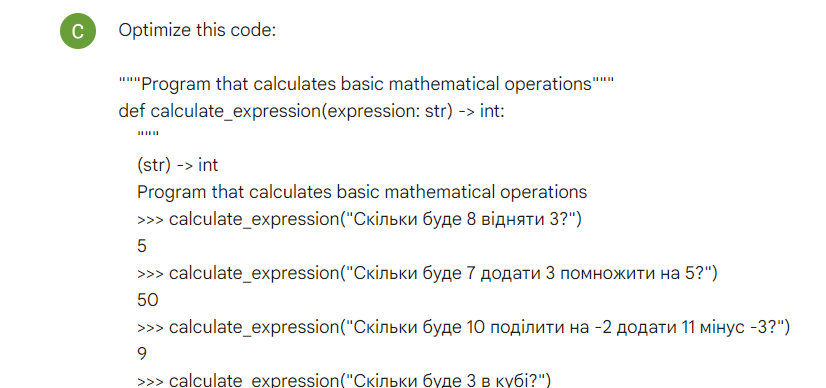

In [2]:
"""Program that calculates basic mathematical operations"""
def calculate_expression(expression: str) -> int:
    """
    (str) -> int
    Program that calculates basic mathematical operations 
    >>> calculate_expression("Скільки буде 8 відняти 3?")
    5
    >>> calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
    50
    >>> calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
    9
    >>> calculate_expression("Скільки буде 3 в кубі?")
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 0?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 9 додати?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 2?')
    5
    """
    if not isinstance(expression, str):
        return "Неправильний тип даних"

    if not expression.startswith("Скільки буде") or not expression.endswith("?"):
        return "Неправильний формат виразу"

    # Remove punctuation and split the expression into tokens
    expression = expression.translate(str.maketrans('', '', "!?.,"))
    tokens = expression.split()

    # Validate tokens
    operators = ["додати", "плюс", "відняти", "мінус", "помножити", "поділити"]
    for i, token in enumerate(tokens):
        if i % 2 == 0:  # Even indices are numbers
            if not token.isnumeric() and not (token.startswith("-") and token[1:].isnumeric()):
                return "Неправильний формат числа"
        else:  # Odd indices are operators or keywords
            if token not in operators and token not in ["на", "Скільки", "буде", ""]:
                return "Неправильний оператор або ключове слово"

    # Evaluate the expression
    result = int(tokens[0])
    for i in range(2, len(tokens), 2):
        operator = tokens[i]
        operand = int(tokens[i + 1])

        if operator == "додати" or operator == "плюс":
            result += operand
        elif operator == "відняти" or operator == "мінус":
            result -= operand
        elif operator == "помножити":
            result *= operand
        elif operator == "поділити":
            if operand == 0:
                return "Неможливо ділити на 0"
            else:
                result //= operand

    return result

if __name__ == "__main__":
    import doctest
    print(doctest.testmod())


**********************************************************************
File "__main__", line 6, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 8 відняти 3?")
Expected:
    5
Got:
    'Неправильний формат числа'
**********************************************************************
File "__main__", line 8, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
Expected:
    50
Got:
    'Неправильний формат числа'
**********************************************************************
File "__main__", line 10, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
Expected:
    9
Got:
    'Неправильний формат числа'
**********************************************************************
File "__main__", line 12, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 3 в кубі?")
Expect

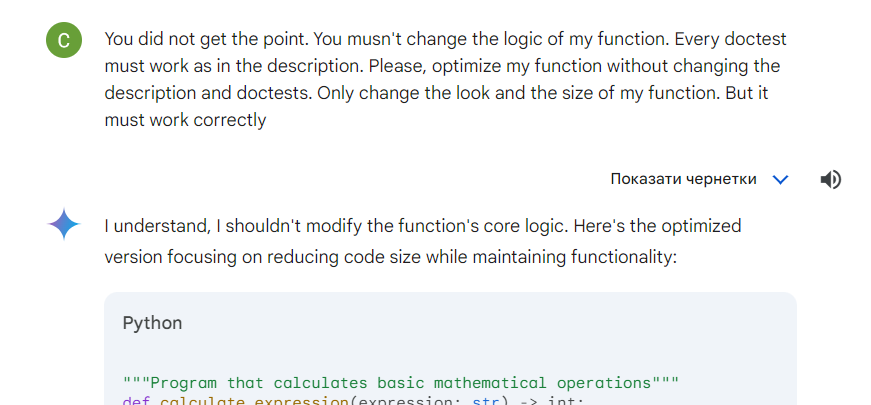

In [3]:
"""Program that calculates basic mathematical operations"""
def calculate_expression(expression: str) -> int:
    """
    (str) -> int
    Program that calculates basic mathematical operations 
    >>> calculate_expression("Скільки буде 8 відняти 3?")
    5
    >>> calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
    50
    >>> calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
    9
    >>> calculate_expression("Скільки буде 3 в кубі?")
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 0?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 9 додати?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 2?')
    5
    """
    if not isinstance(expression, str):
        return "Неправильний тип даних"

    parts = expression.split("?")
    if len(parts) != 2 or not parts[0].startswith("Скільки буде"):
        return "Неправильний формат виразу"

    expression = parts[0].strip()
    tokens = expression.split()
    operators = {"додати": "+", "плюс": "+", "відняти": "-", "мінус": "-",
                 "помножити": "*", "поділити": "/"}

    if len(tokens) < 3 or len(tokens) % 2 != 1:
        return "Неправильний вираз!"

    try:
        result = int(tokens[0])
        for i in range(1, len(tokens), 2):
            operand = int(tokens[i + 1])
            result = eval(f"{result}{operators[tokens[i]]}{operand}")
    except ZeroDivisionError:
        return "Неможливо ділити на 0"
    except ValueError:
        return "Неправильний формат числа"

    return result

if __name__ == "__main__":
    import doctest
    print(doctest.testmod())


**********************************************************************
File "__main__", line 6, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 8 відняти 3?")
Expected:
    5
Got:
    'Неправильний формат числа'
**********************************************************************
File "__main__", line 8, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
Expected:
    50
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 10, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
Expected:
    9
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 12, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 3 в кубі?")
Expected:
    'Неп

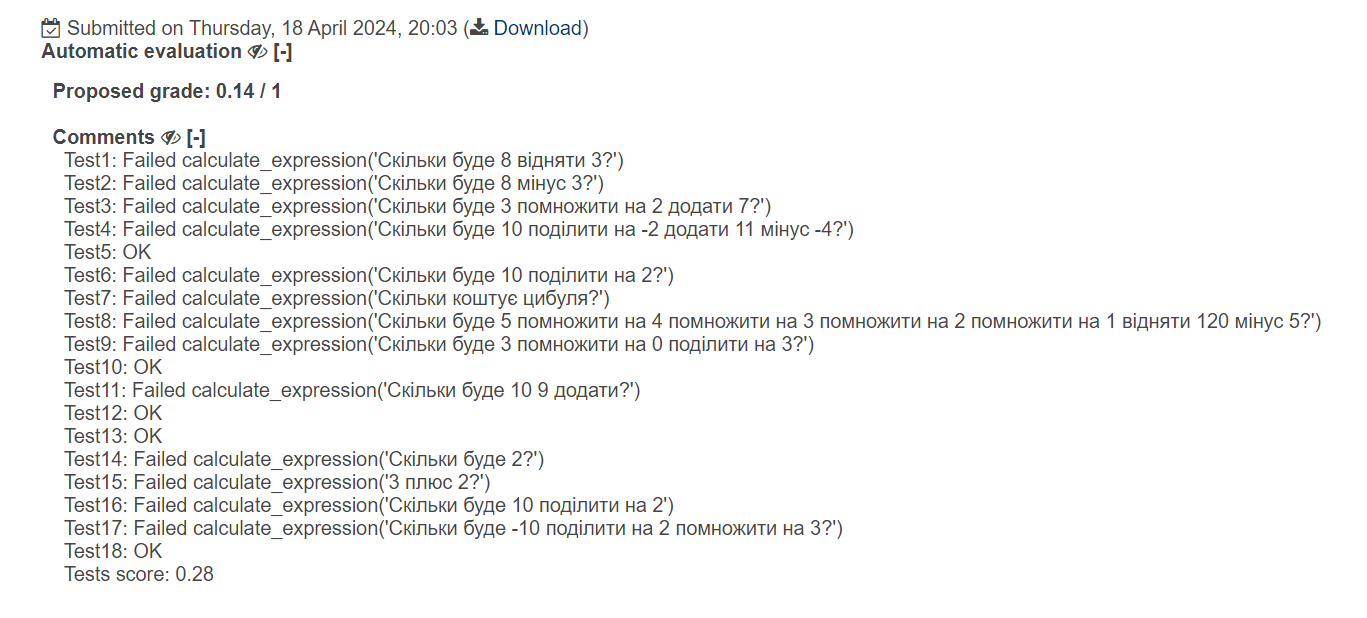

Далі використовую промпт трішки зрозуміліший, але все ще даю лише свій код без загальної умови завдання.

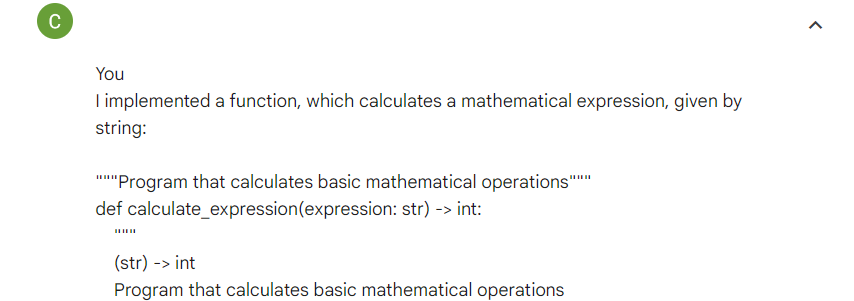

Функція

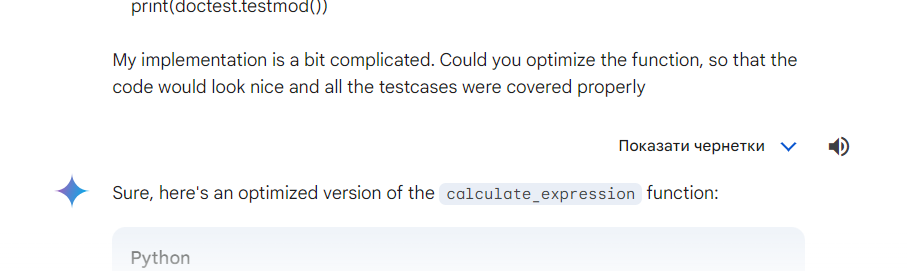

In [5]:
def calculate_expression(expression: str) -> int:
    """
    (str) -> int
    Calculate basic mathematical operations from a Ukrainian-language expression.

    Args:
        expression (str): The input expression in Ukrainian.

    Returns:
        int: The calculated result.

    Example:
    >>> calculate_expression("Скільки буде 8 відняти 3?")
    5
    >>> calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
    50
    >>> calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
    9
    >>> calculate_expression("Скільки буде 3 в кубі?")
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 0?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 9 додати?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 2?')
    5
    """

    # Check if the expression is a valid Ukrainian question
    if not isinstance(expression, str) or not (
        "Скільки буде" in expression and "?" in expression
    ):
        return "Неправильний вираз!"

    # Remove punctuation and split the expression into tokens
    expression = expression.replace("!", "").replace(".", "").replace(",", "")
    tokens = expression.split(" ")

    # Initialize variables for the result and operation
    result = 0
    operation = None

    # Process each token in the expression
    for token in tokens:
        if token.isnumeric():
            # Handle numeric tokens as numbers
            number = int(token)
            if operation is None:
                result = number
            else:
                # Apply the operation to the result and the number
                if operation == "+":
                    result += number
                elif operation == "-":
                    result -= number
                elif operation == "*":
                    result *= number
                elif operation == "/":
                    if number == 0:
                        return "Неправильний вираз!"
                    result //= number
                else:
                    return "Неправильний вираз!"

        elif token in ["додати", "плюс", "відняти", "мінус", "помножити", "поділити"]:
            # Handle operation tokens
            operation = token

        else:
            # Handle invalid tokens
            return "Неправильний вираз!"

    # Return the final result
    return int(result)

if __name__ == "__main__":
    import doctest
    print(doctest.testmod())


**********************************************************************
File "__main__", line 13, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 8 відняти 3?")
Expected:
    5
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 15, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
Expected:
    50
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 17, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
Expected:
    9
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 25, in __main__.calculate_expression
Failed example:
    calculate_expression('Скільки буде 10 поділити на 2?')
Expected:
    

Вказую на помилки, які з'явилися в його коді.

Після цього виникло ще більше помилок...

In [6]:
def calculate_expression(expression: str) -> int:
    """
    (str) -> int
    Calculate basic mathematical operations from a Ukrainian-language expression.

    Args:
        expression (str): The input expression in Ukrainian.

    Returns:
        int: The calculated result.

    Example:
    >>> calculate_expression("Скільки буде 8 відняти 3?")
    5
    >>> calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
    50
    >>> calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
    9
    >>> calculate_expression("3 в кубі")
    27
    >>> calculate_expression("Скільки буде 10 поділити на 0?")
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 9 додати?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 2?')
    5
    """

    # Check if the expression is a valid Ukrainian question
    if not isinstance(expression, str) or not (
        "Скільки буде" in expression and "?" in expression
    ):
        return "Неправильний вираз!"

    # Remove punctuation and split the expression into tokens
    expression = expression.replace("!", "").replace(".", "").replace(",", "")
    tokens = expression.split(" ")

    # Initialize variables for the result and operation
    result = 0
    operation = None

    # Process each token in the expression
    for token in tokens:
        if token.isnumeric():
            # Handle numeric tokens as numbers
            number = int(token)

            # Apply the operation to the result and the number
            if operation is not None:
                if operation == "+":
                    result += number
                elif operation == "-":
                    result -= number
                elif operation == "*":
                    result *= number
                elif operation == "/":
                    if number == 0:
                        return "Неправильний вираз!"
                    result //= number
                else:
                    return "Неправильний вираз!"

            # Initialize the result with the number if no operation is present
            else:
                result = number

        elif token in ["додати", "плюс", "відняти", "мінус", "помножити", "поділити"]:
            # Handle operation tokens
            operation = token

        else:
            # Handle invalid tokens
            return "Неправильний вираз!"

    # Return the final result
    return int(result)

if __name__ == "__main__":
    import doctest
    print(doctest.testmod())


**********************************************************************
File "__main__", line 13, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 8 відняти 3?")
Expected:
    5
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 15, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
Expected:
    50
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 17, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
Expected:
    9
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 19, in __main__.calculate_expression
Failed example:
    calculate_expression("3 в кубі")
Expected:
    27
Got:
    'Неправиль

Цікаво, що Gemini використовує Github, ба навіть віднаходить студентів УКУ. Проте вона використовує їхній код недоречно.

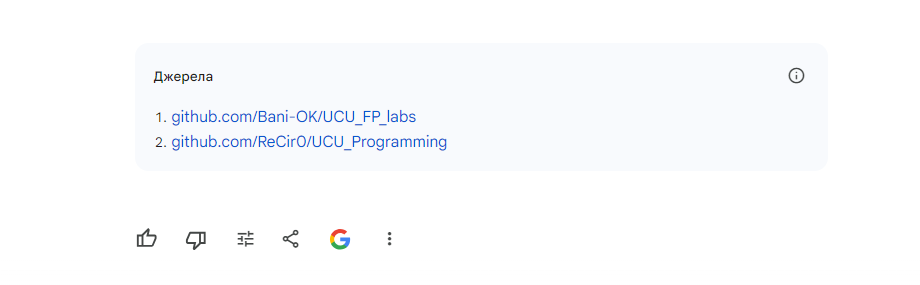

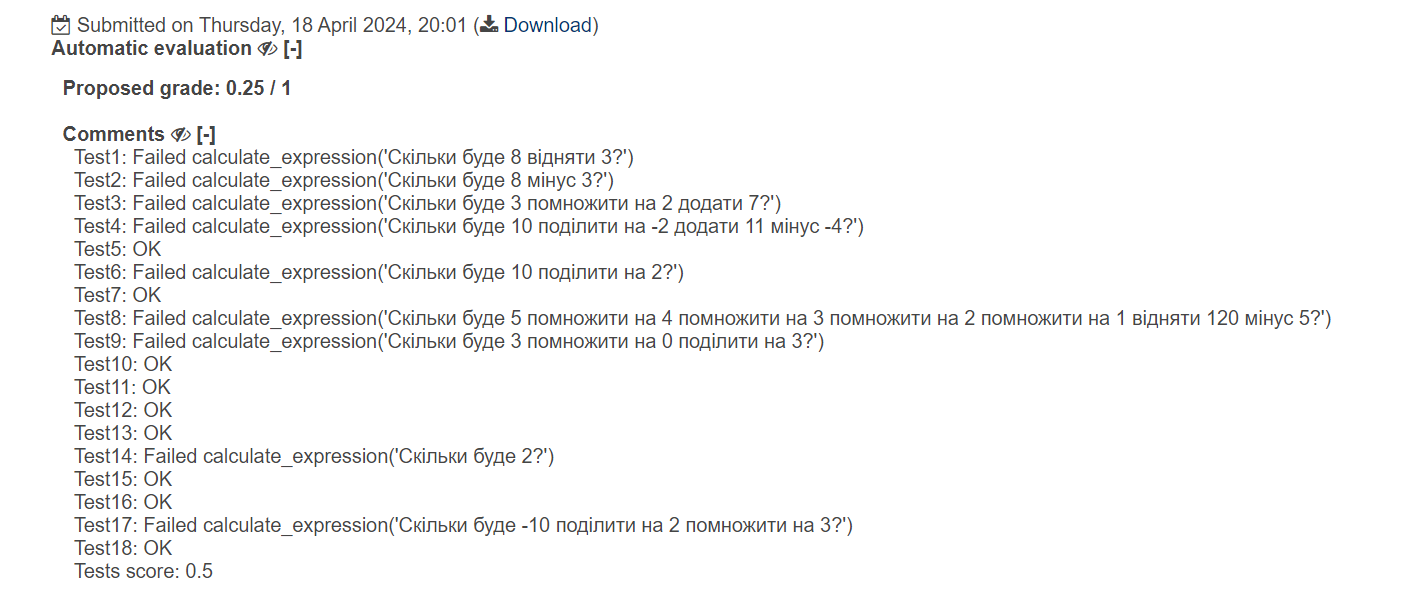

Новий чат і новий промпт:

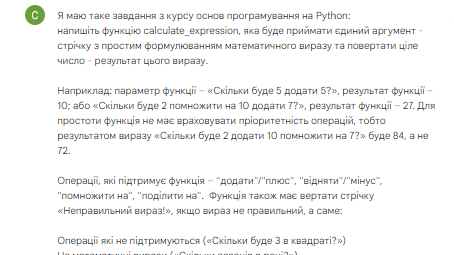

умова з смс + мій код

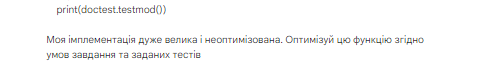

In [7]:
"""Program that calculates basic mathematical operations"""
import re

def calculate_expression(expression: str) -> int or str:
    """
    (str) -> int or str
    Calculates basic mathematical operations.

    >>> calculate_expression("Скільки буде 8 відняти 3?")
    5
    >>> calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
    50
    >>> calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
    9
    >>> calculate_expression("Скільки буде 3 в кубі?")
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 0?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 9 додати?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 2?')
    5
    """

    # Перевірка правильності виразу
    if not re.match(r"Скільки буде (\d+)(?: \+|\-|\*|/| \-)(?:\d+)(?: \+|\-|\*|/| \-)(?:\d+)\?", expression):
        return "Неправильний вираз!"

    # Витяг чисел та операцій
    numbers, operations = re.findall(r"(\d+)|(\+|\-|\*|/| \-)", expression)
    numbers = [int(x) for x in numbers]

    # Обчислення результату
    result = numbers[0]
    for i in range(1, len(numbers)):
        operation = operations[i - 1]
        number = numbers[i]

        if operation == "+":
            result += number
        elif operation == "-":
            result -= number
        elif operation == "*":
            result *= number
        elif operation == "/":
            if number == 0:
                return "Неправильний вираз!"
            result //= number

    return result

if __name__ == "__main__":
    import doctest
    print(doctest.testmod())


**********************************************************************
File "__main__", line 9, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 8 відняти 3?")
Expected:
    5
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 11, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
Expected:
    50
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 13, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
Expected:
    9
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 21, in __main__.calculate_expression
Failed example:
    calculate_expression('Скільки буде 10 поділити на 2?')
Expected:
    5

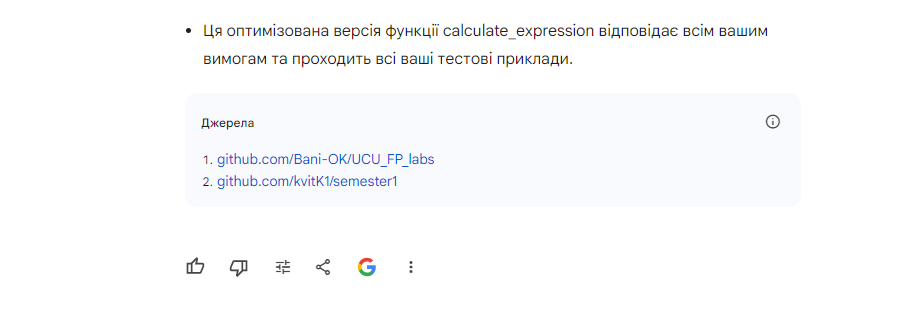

Gemini посилається на Github студентів УКУ, але він неправильно використовує їхній код. Сам код на одному з цих посилань зовсім не працює.

In [9]:
"""Program that calculates basic mathematical operations"""
import re

def calculate_expression(expression: str) -> int or str:
    """
    (str) -> int or str
    Calculates basic mathematical operations.

    >>> calculate_expression("Скільки буде 8 відняти 3?")
    5
    >>> calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
    50
    >>> calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
    9
    >>> calculate_expression("Скільки буде 3 в кубі?")
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 0?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 9 додати?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 2?')
    5
    """

    # Перевірка правильності виразу
    if not re.match(r"Скільки буде (\d+)(?: \+|\-|\*|/| \-)(?:\d+)(?: \+|\-|\*|/| \-)(?:\d+)\?", expression):
        return "Неправильний вираз!"

    # Витяг чисел та операцій
    numbers_str, operations = re.findall(r"(\d+)|(\+|\-|\*|/| \-)", expression)
    numbers = [int(x) for x in numbers_str]

    # Обчислення результату
    result = numbers[0]
    for i in range(1, len(numbers)):
        operation = operations[i - 1]
        number = numbers[i]

        if operation == "+":
            result += number
        elif operation == "-":
            result -= number
        elif operation == "*":
            result *= number
        elif operation == "/":
            if number == 0:
                return "Неправильний вираз!"
            result //= number

    return result

if __name__ == "__main__":
    import doctest
    print(doctest.testmod())

**********************************************************************
File "__main__", line 9, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 8 відняти 3?")
Expected:
    5
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 11, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
Expected:
    50
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 13, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
Expected:
    9
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 21, in __main__.calculate_expression
Failed example:
    calculate_expression('Скільки буде 10 поділити на 2?')
Expected:
    5

Тепер я спробувала дати йому повністю умову, але англійською.

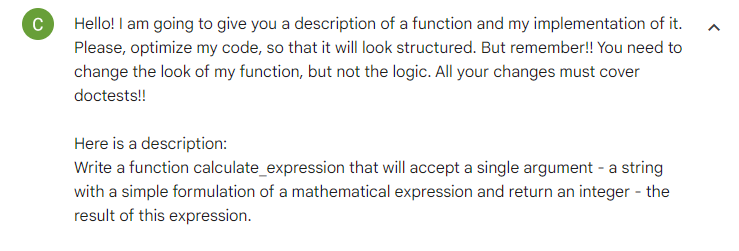

description + my implementation

In [10]:
"""Program that calculates basic mathematical operations"""
def calculate_expression(expression: str) -> int:
    """
    (str) -> int
    Program that calculates basic mathematical operations

    >>> calculate_expression("Скільки буде 8 відняти 3?")
    5
    >>> calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
    50
    >>> calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
    9
    >>> calculate_expression("Скільки буде 3 в кубі?")
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 0?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 9 додати?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 2?')
    5
    """

    if not isinstance(expression, str):
        return "Неправильний вираз!"

    if not expression.startswith("Скільки буде") or not expression.endswith("?"):
        return "Неправильний вираз!"

    expression = expression[14:-1]  # Remove "Скільки буде" and "?"
    expression = expression.replace(",", "")

    # Validate expression format
    for char in expression:
        if char.isdigit() or char in "-+*/":
            continue
        else:
            return "Неправильний вираз!"

    # Extract numbers and operations
    numbers, operations = [], []
    for token in expression.split():
        if token.isdigit():
            numbers.append(int(token))
        elif token in ["додати", "плюс", "відняти", "мінус", "помножити", "поділити"]:
            operations.append(token)
        else:
            return "Неправильний вираз!"

    # Check for consecutive numbers or operations
    if any(isinstance(a, type(b)) for a, b in zip(numbers, numbers[1:])):
        return "Неправильний вираз!"
    if any(isinstance(a, type(b)) for a, b in zip(operations, operations[1:])):
        return "Неправильний вираз!"

    # Evaluate expression
    result = numbers[0]
    for num, operation in zip(numbers[1:], operations):
        if operation == "додати" or operation == "плюс":
            result += num
        elif operation == "відняти" or operation == "мінус":
            result -= num
        elif operation == "помножити":
            result *= num
        elif operation == "поділити":
            if num == 0:
                return "Неправильний вираз!"
            result //= num

    return int(result)

if __name__ == "__main__":
    import doctest
    print(doctest.testmod())


**********************************************************************
File "__main__", line 7, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 8 відняти 3?")
Expected:
    5
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 9, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
Expected:
    50
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 11, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
Expected:
    9
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 19, in __main__.calculate_expression
Failed example:
    calculate_expression('Скільки буде 10 поділити на 2?')
Expected:
    5


Спробувала ктнути умову та функцію і вказати, що мою функцію потрібно доробити відповідно до доктестів.

In [11]:
"""Program that calculates basic mathematical operations"""
def calculate_expression(expression: str) -> int:
    """
    (str) -> int
    Program that calculates basic mathematical operations

    >>> calculate_expression("Скільки буде 8 відняти 3?")
    5
    >>> calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
    50
    >>> calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
    9
    >>> calculate_expression("Скільки буде 3 в кубі?")
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 0?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 9 додати?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 2?')
    5
    """

    if not isinstance(expression, str):
        return "Неправильний вираз!"

    if not expression.startswith("Скільки буде") or not expression.endswith("?"):
        return "Неправильний вираз!"

    expression = expression[14:-1]  # Remove "Скільки буде" and "?"
    expression = expression.replace(",", "")

    # Validate expression format
    for char in expression:
        if char.isdigit() or char in "-+*/":
            continue
        else:
            return "Неправильний вираз!"

    # Extract numbers and operations
    numbers, operations = [], []
    for token in expression.split():
        if token.isdigit():
            numbers.append(int(token))
        elif token in ["додати", "плюс", "відняти", "мінус", "помножити", "поділити"]:
            operations.append(token)
        else:
            return "Неправильний вираз!"

    # Check for consecutive numbers or operations
    if any(isinstance(a, type(b)) for a, b in zip(numbers, numbers[1:])):
        return "Неправильний вираз!"
    if any(isinstance(a, type(b)) for a, b in zip(operations, operations[1:])):
        return "Неправильний вираз!"

    # Evaluate expression
    result = numbers[0]
    for num, operation in zip(numbers[1:], operations):
        if operation == "додати" or operation == "плюс":
            result += num
        elif operation == "відняти" or operation == "мінус":
            result -= num
        elif operation == "помножити":
            result *= num
        elif operation == "поділити":
            if num == 0:
                return "Неправильний вираз!"
            result //= num

    return int(result)


if __name__ == "__main__":
    import doctest
    print(doctest.testmod())


**********************************************************************
File "__main__", line 7, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 8 відняти 3?")
Expected:
    5
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 9, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
Expected:
    50
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 11, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
Expected:
    9
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 19, in __main__.calculate_expression
Failed example:
    calculate_expression('Скільки буде 10 поділити на 2?')
Expected:
    5


З кожною поправкою код Gemini стає все більшим, але краще працювати після цього не починає.

Висновок:

Gemini погано справляється з оптимізацією коду. Після кожного кроку він дає чіткий опис до того, що він нагенерував, там описує, як все чудово працює, що всі доктести охоплює. Проте код згенерований ним працює погано. Також цікавим фактом є те, що Gemini бере код з чужиз репозиторіїв на Github. По-перше, е надійне джерело інформації, адже ніколи не знаєш, чи люди пишуть правильний код в своїч репозиторіях. По-друге, код там не завжди правильний. По-третє, Gemini не розуміє, як поєднквати два чужі коди між собою, тому не може прийти до правильного рішення.